In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
os.chdir("/Users/zyxu/Documents/R/23spring")

from tools.pre_visz import pre_visz

import json

In [17]:
###### ground truth
study_ground_truth_path_Us  = "./dataset/simulation/avg_prop_5/Us.json"
study_ground_truth_path_V = "./dataset/simulation/avg_prop_5/V.json"
study_ground_truth_path_Sigmas  = "./dataset/simulation/avg_prop_5/Sigmas.json"
study_ground_truth_path_Cs = "./dataset/simulation/avg_prop_5/Cs.json"
# Load the JSON file
with open(study_ground_truth_path_Us, 'r') as json_file:
    sim_study_groundTruth_Us = json.load(json_file)
with open(study_ground_truth_path_V, 'r') as json_file:
    sim_study_ground_truth_V = json.load(json_file)
with open(study_ground_truth_path_Sigmas, 'r') as json_file:
    sim_study_groundTruth_Sigmas = json.load(json_file)
with open(study_ground_truth_path_Cs, 'r') as json_file:
    sim_study_ground_truth_Cs = json.load(json_file)

In [6]:
study_decompositions, study_decompositions_traditional, optimized_V = pre_visz(
        matrix_data_path = "./dataset/simulation/avg_prop_5/sim_matrix_data.csv", 
        study_names_path = "./dataset/simulation/avg_prop_5/sim_study_name.csv",
        optimized_V_path = "./output/sim/best_V.pt")
unique_studies = study_decompositions.keys()

(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20


In [5]:
np.array(sim_study_groundTruth_Us['A']).shape

(100, 20)

### check U

In [7]:
def check_ortho(U):
    # Calculate the product of the matrix and its transpose
    product = np.dot(U.T, U)

    # Check if the product is approximately equal to the identity matrix
    is_orthogonal = np.allclose(product, np.eye(U.shape[1]))

    return product.sum()

    

In [8]:
for study in unique_studies:
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])

    print(f"==== {study} =====")
    print(f"The matrix U_study is {check_ortho(U_study)}.")
    
    print(f"The matrix U_study_traditional is {check_ortho(U_study_traditional)}.")
    print(f"The matrix U_groundTruth is {check_ortho(U_groundTruth)}.")
    
    


==== A =====
The matrix U_study is 20.000000000000007.
The matrix U_study_traditional is 4.431522111283291.
The matrix U_groundTruth is 20.0.
==== B =====
The matrix U_study is 20.000000000000004.
The matrix U_study_traditional is 2.1391685963865603.
The matrix U_groundTruth is 20.0.
==== C =====
The matrix U_study is 20.000000000000007.
The matrix U_study_traditional is 2.795929643129279.
The matrix U_groundTruth is 19.999999999999996.
==== D =====
The matrix U_study is 20.0.
The matrix U_study_traditional is 2.244048720840036.
The matrix U_groundTruth is 20.000000000000004.
==== E =====
The matrix U_study is 20.0.
The matrix U_study_traditional is 8.389330928360835.
The matrix U_groundTruth is 19.999999999999996.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_U(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])

    for U_tmp in [U_study, U_study_traditional, U_groundTruth]:
        if check_ortho(U_study):
            print(f"The matrix U_groundTruth for {study} is orthogonal.")
        else:
            print(f"The matrix U_groundTruth for {study} is orthogonal.")

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(U_groundTruth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth U matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

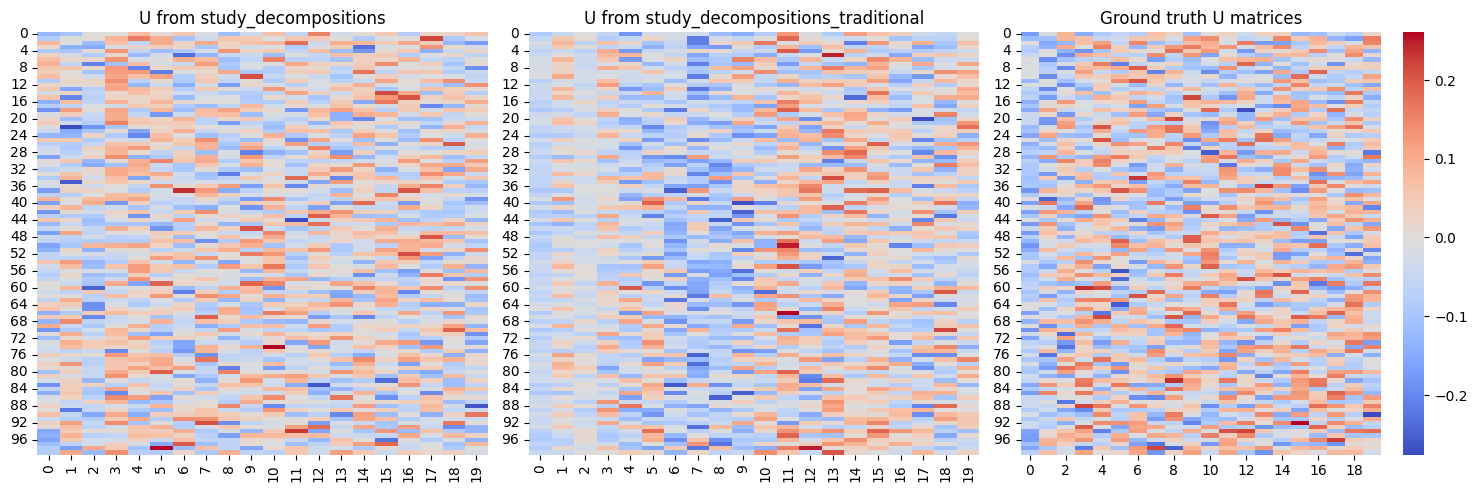

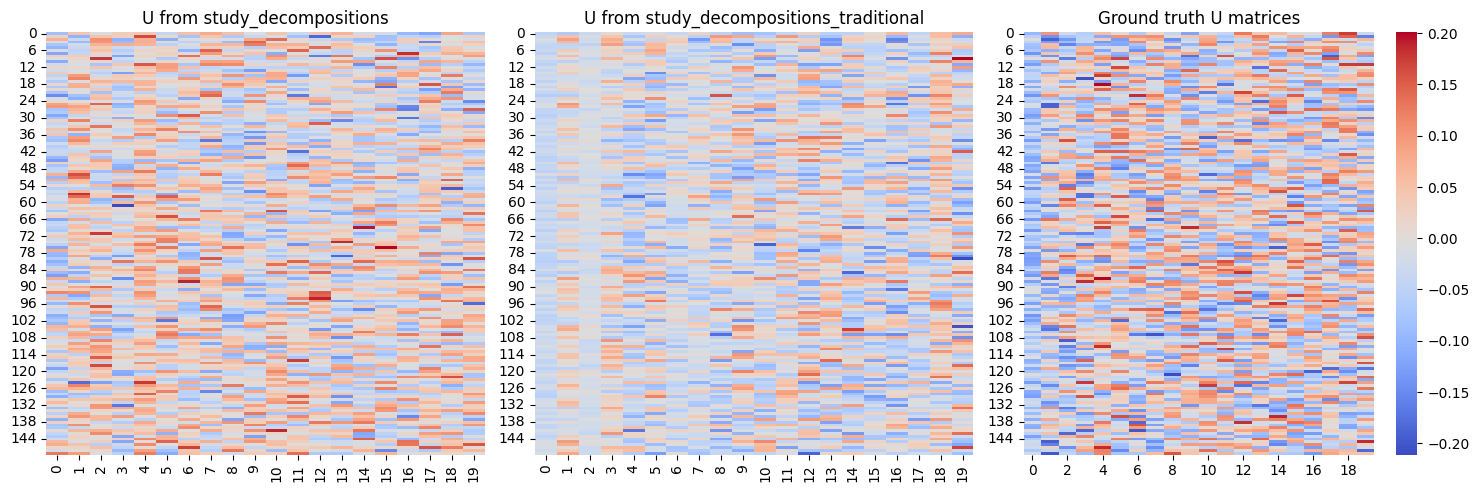

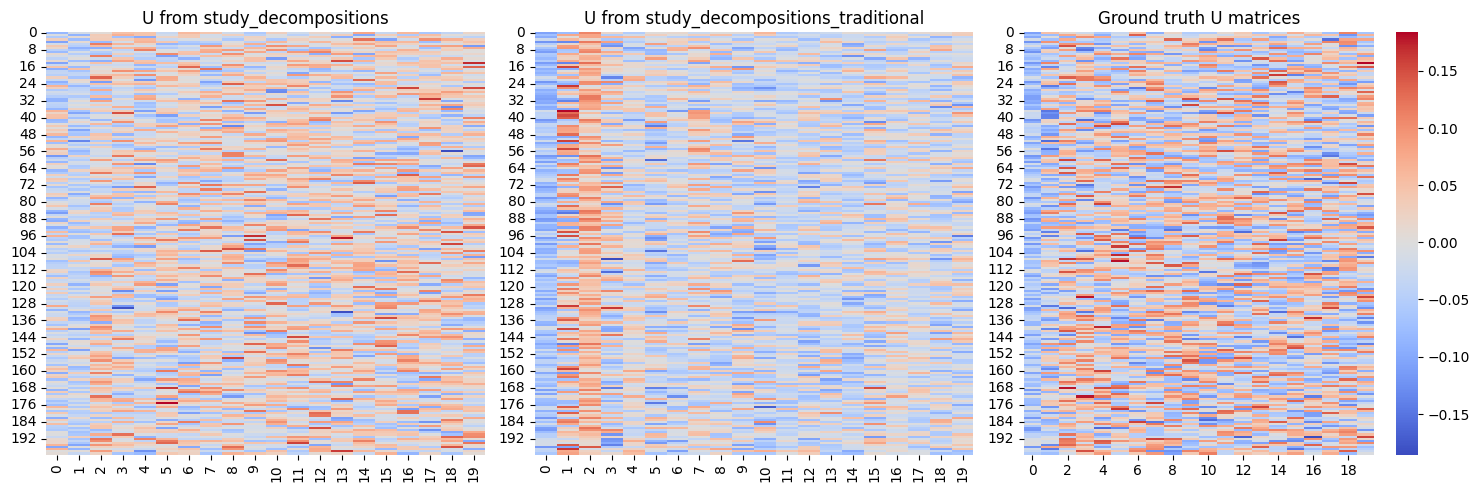

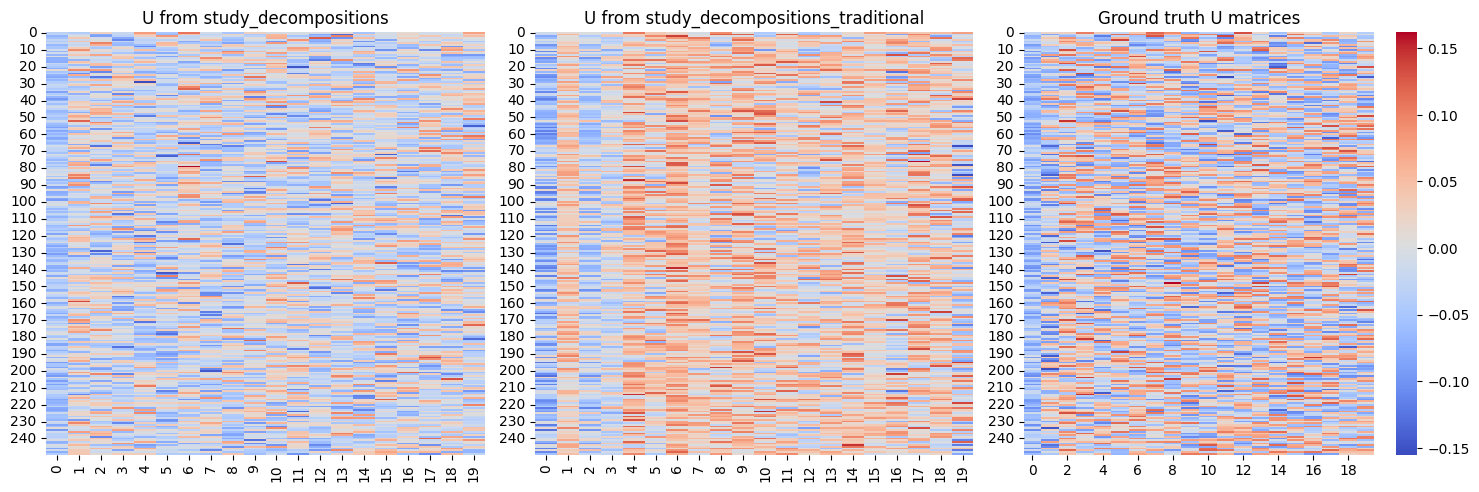

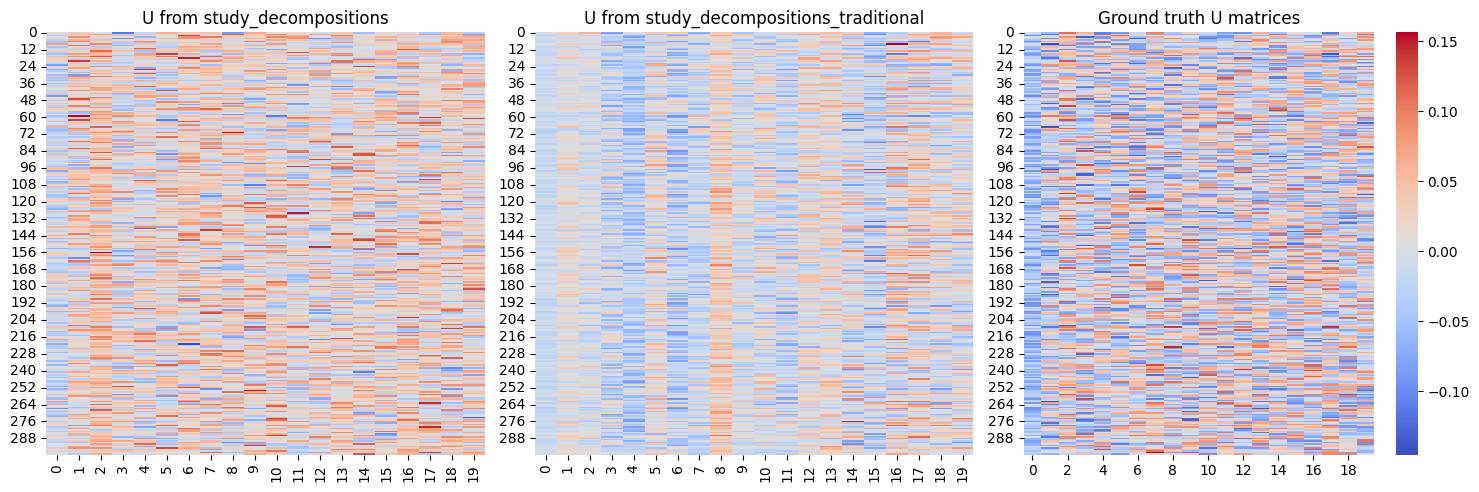

In [5]:
for study in unique_studies:
    plot_study_U(study)

In [29]:
U_study = study_decompositions[study][0]
U_study_traditional = study_decompositions_traditional[study][0]
# U_difference = U_study - U_study_traditional
U_groundTruth = np.array(sim_study_groundTruth_Us[study])

In [32]:
np.linalg.norm(U_study)

4.4721359549995805

In [33]:
np.linalg.norm(U_study_traditional)

2.0019838511657313

In [34]:
np.linalg.norm(U_groundTruth)

4.47213595499958

In [35]:
np.linalg.norm(U_study - U_groundTruth)

6.2292956600286695

In [6]:
from collections import defaultdict 

def com_loss(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])
    # Compute difference matrices
    diff_U_study = U_study - U_groundTruth
    diff_U_study_traditional = U_study_traditional - U_groundTruth

    # Compute Frobenius norms
    norm_U_study = np.linalg.norm(diff_U_study, 'fro')
    norm_U_study_traditional = np.linalg.norm(diff_U_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between U_study and U_groundTruth: {norm_U_study}")
    print(f"Frobenius norm of the difference between U_study_traditional and U_groundTruth: {norm_U_study_traditional}")

    return norm_U_study, norm_U_study_traditional
loss = defaultdict(list)

for study in unique_studies:
    loss["study"].append(study)
    norm_U_study, norm_U_study_traditional = com_loss(study)
    loss["ours"].append(norm_U_study)
    loss["SVD"].append(norm_U_study_traditional)

import pandas as pd
pd.DataFrame(loss)

Frobenius norm of the difference between U_study and U_groundTruth: 6.462049014044722
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 5.091056023464826
Frobenius norm of the difference between U_study and U_groundTruth: 6.115992381365242
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.663845726154937
Frobenius norm of the difference between U_study and U_groundTruth: 5.950633212651604
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.977383725542877
Frobenius norm of the difference between U_study and U_groundTruth: 6.247159565780792
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.734029752557694
Frobenius norm of the difference between U_study and U_groundTruth: 6.2292956600286695
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.877760393092555


,study,ours,SVD
0,A,6.462049,5.091056
1,B,6.115992,4.663846
2,C,5.950633,4.977384
3,D,6.247160,4.734030
4,E,6.229296,4.877760


In [10]:
# study_decompositions_traditional['A'][2] - study_decompositions_traditional['B'][2]
# optimized_V.detach().numpy().shape
study_decompositions_traditional['A'][2].shape
# np.array(sim_study_ground_truth_V['V']).shape

(200, 20)

### check V

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_V(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V):
    V_study = optimized_V.detach().numpy() 
    V_study_traditional = study_decompositions_traditional['A'][2] # any study will work
    # U_difference = U_study - U_study_traditional
    # print(optimized_V)
    # print(sim_study_ground_truth_V)
    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    V_groundTruth = np.array(sim_study_ground_truth_V)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(V_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('V from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(V_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('V from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(V_groundTruth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth V matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

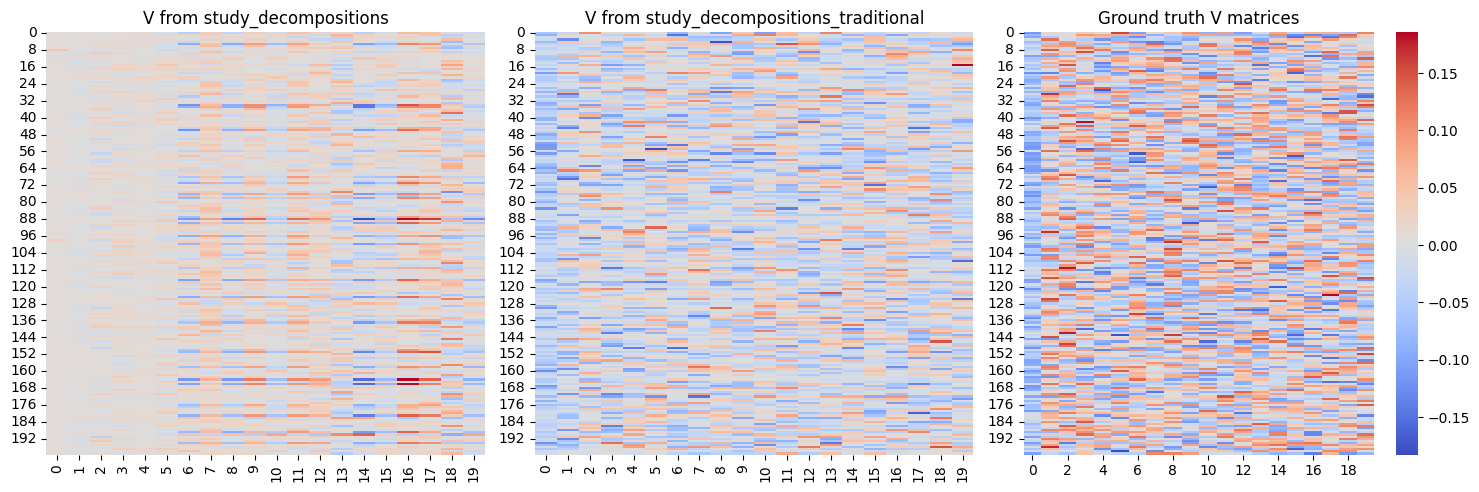

In [9]:
plot_study_V(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V)

In [10]:
len(study_decompositions_traditional['A'])

3

In [36]:
from collections import defaultdict 

def com_loss(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V):
    U_study = optimized_V.detach().numpy()
    U_study_traditional = study_decompositions_traditional[study][2]
    # U_difference = U_study - U_study_traditional
    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    U_groundTruth = np.array(sim_study_ground_truth_V)
    # Compute difference matrices
    diff_U_study = U_study - U_groundTruth
    diff_U_study_traditional = U_study_traditional - U_groundTruth

    print(f"V_study: {np.linalg.norm(U_study)} | V_study_traditional: {np.linalg.norm(U_study_traditional)} | V_groundTruth: {np.linalg.norm(U_groundTruth)}")

    # Compute Frobenius norms
    norm_U_study = np.linalg.norm(diff_U_study, 'fro')
    norm_U_study_traditional = np.linalg.norm(diff_U_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between V_study and V_groundTruth: {norm_U_study}")
    print(f"Frobenius norm of the difference between V_study_traditional and V_groundTruth: {norm_U_study_traditional}")

    return norm_U_study, norm_U_study_traditional
norm_V_study, norm_V_study_traditional = com_loss(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V)



V_study: 9.660022735595703 | V_study_traditional: 4.472135954999581 | V_groundTruth: 4.4721359549995805
Frobenius norm of the difference between V_study and V_groundTruth: 10.704166238063738
Frobenius norm of the difference between V_study_traditional and V_groundTruth: 6.264167911337126


### check X

In [15]:
sim_study_ground_truth_V

{'V': [[-0.11484225453006225,
   0.02500655756575622,
   0.001004775046303294,
   0.039605231396808604,
   0.006162046054932022,
   0.1564455336241697,
   -0.10820598434065118,
   0.015356451097923288,
   0.04634143648520428,
   0.09931692540105898,
   -0.08728233039285033,
   0.08975002652065567,
   -0.10766010372742195,
   -0.00826541458162898,
   0.07985178356196765,
   -0.04349959014285425,
   0.06712695144463321,
   0.06956229523525896,
   -0.059378966215212006,
   0.11330823526026323],
  [-0.08142049010525784,
   -0.014124190787336621,
   0.011624878392235525,
   0.09431239769652944,
   0.07789613098096135,
   0.07170537344026247,
   0.07525112596813816,
   -0.09042308846154778,
   -0.027495820759635494,
   0.07046357977983586,
   0.08482910233362953,
   -0.08434186322502424,
   -0.07917161638910045,
   -0.07320540492889335,
   0.10529375715285044,
   -0.1273642047566252,
   -0.13243968880360857,
   -0.1037380512068193,
   0.13100041586025257,
   0.026119421477838002],
  [-0.1007

In [20]:
from collections import defaultdict 

def com_loss(study, sim_study_ground_truth_V):
    # print(study_decompositions[study][0].shape, np.diag(study_decompositions[study][1]).shape, optimized_V.detach().numpy().T.shape, study_decompositions[study][2].shape)
    X_study = study_decompositions[study][0] @ np.diag(study_decompositions[study][1]) @ optimized_V.detach().numpy().T @ study_decompositions[study][2]
    # print(study_decompositions_traditional[study][0].shape, np.diag(study_decompositions_traditional[study][1]).shape, study_decompositions_traditional[study][2].T.shape)
    X_study_traditional = study_decompositions_traditional[study][0] @ np.diag(study_decompositions_traditional[study][1]) @ study_decompositions_traditional[study][2].T
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])
    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    V_groundTruth = np.array(sim_study_ground_truth_V)
    C_groundTruth = np.array(sim_study_ground_truth_Cs[study])
    Sigma_groundTruth = np.array(sim_study_groundTruth_Sigmas[study])
    X_groundTruth = U_groundTruth @ Sigma_groundTruth @ V_groundTruth.T @ C_groundTruth
    
    # Compute difference matrices
    diff_X_study = X_study - X_groundTruth
    diff_X_study_traditional = X_study_traditional - X_groundTruth

    # Compute Frobenius norms
    norm_X_study = np.linalg.norm(diff_X_study, 'fro')
    norm_X_study_traditional = np.linalg.norm(diff_X_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between X_study and X_groundTruth: {norm_X_study}")
    print(f"Frobenius norm of the difference between X_study_traditional and X_groundTruth: {norm_X_study_traditional}")

    return norm_X_study, norm_X_study_traditional
loss = defaultdict(list)

for study in unique_studies:
    loss["study"].append(study)
    norm_U_study, norm_U_study_traditional = com_loss(study, sim_study_ground_truth_V)
    loss["ours"].append(norm_U_study)
    loss["SVD"].append(norm_U_study_traditional)

import pandas as pd
pd.DataFrame(loss)

Frobenius norm of the difference between X_study and X_groundTruth: 23438.221416783384
Frobenius norm of the difference between X_study_traditional and X_groundTruth: 9699.35815092237
Frobenius norm of the difference between X_study and X_groundTruth: 14875.394327182263
Frobenius norm of the difference between X_study_traditional and X_groundTruth: 8273.319676323033
Frobenius norm of the difference between X_study and X_groundTruth: 29416.08078076167
Frobenius norm of the difference between X_study_traditional and X_groundTruth: 8462.798485497779
Frobenius norm of the difference between X_study and X_groundTruth: 28975.477617074146
Frobenius norm of the difference between X_study_traditional and X_groundTruth: 8194.119742700177
Frobenius norm of the difference between X_study and X_groundTruth: 20530.23236424357
Frobenius norm of the difference between X_study_traditional and X_groundTruth: 9057.871742192594


,study,ours,SVD
0,A,23438.221417,9699.358151
1,B,14875.394327,8273.319676
2,C,29416.080781,8462.798485
3,D,28975.477617,8194.119743
4,E,20530.232364,9057.871742


In [24]:
study_decompositions[study]

(array([[-0.14810715, -0.11954305, -0.00716575, ...,  0.02610043,
          0.03172081,  0.07160645],
        [-0.09793644, -0.00349122,  0.00518826, ...,  0.2588538 ,
         -0.10549591, -0.02496473],
        [ 0.09787127, -0.00880012, -0.13394756, ...,  0.0483388 ,
         -0.14827027, -0.20356304],
        ...,
        [-0.13499243, -0.07305809, -0.03870914, ..., -0.01039697,
         -0.12176002,  0.09268964],
        [-0.09896267, -0.195315  ,  0.12397134, ..., -0.00280017,
         -0.10266169, -0.00779981],
        [-0.09181582,  0.12338958, -0.13967871, ...,  0.01861741,
          0.04291772, -0.02706059]]),
 array([2.44863009e+04, 5.56417279e+03, 2.79921990e+03, 2.53765623e+03,
        2.39126828e+03, 1.92656942e+03, 1.42252631e+03, 9.98557247e+02,
        8.76352662e+02, 7.41418638e+02, 7.20759996e+02, 5.14288309e+02,
        4.98285111e+02, 4.41544903e+02, 2.66126128e+02, 2.44134157e+02,
        2.04042300e+02, 8.11787023e+01, 4.78216119e+01, 5.17746152e+00]))

In [19]:
np.array(sim_study_groundTruth_Sigmas["A"]).shape

(20, 20)